MATH 317 Lab Assignment 2   
October 22, 2023  
Thomas Cole, 260904382  

In [1]:
import pandas as pd
import numpy as np
import math as math
import matplotlib.pyplot as plt
%matplotlib inline

### **Part 1**)

#### **1**) sin(x) via power series

In [2]:
def sinx(x,n):
    # intialize
    sum = 0
    term = 1
    # loop through to generate terms
    for i in range(n):
        term = math.pow(-1, i) * math.pow(x, 2 * i + 1) / math.factorial(2 * i + 1)
        sum += term
    return sum

**Code to Help Generate Plots**

In [3]:
def generate_errorplot(func,f_compare,x_input,max_n,n_step):

    # generate ns
    ns = np.arange(0,max_n,n_step)

    # generate function values and comparison + errors
    x_f = np.array([func(x_input,n) for n in ns])
    x_fc = np.array([f_compare(x_input) for n in ns])
    error = x_fc - x_f

    es = list(abs(error))

    # convert to log
    for i in range(len(es)):
        if(es[i] != 0):
            es[i] = math.log(es[i])
    
    return ns,es 

**Plots**

In [4]:
p1n, p1e = generate_errorplot(sinx,math.sin,0.1,50,1)
p2n, p2e = generate_errorplot(sinx,math.sin,1,50,1)
p3n, p3e = generate_errorplot(sinx,math.sin,10,50,1)
p4n, p4e = generate_errorplot(sinx,math.sin,100,50,1)

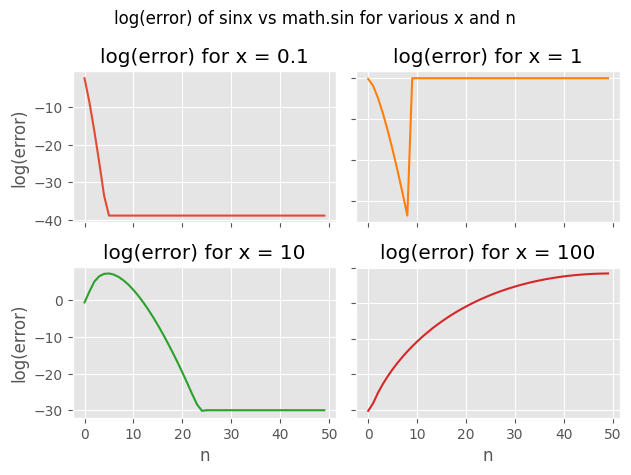

In [5]:
plt.style.use('ggplot')
fig, axs = plt.subplots(2, 2)
fig.suptitle('log(error) of sinx vs math.sin for various x and n')
axs[0, 0].plot(p1n, p1e)
axs[0, 0].set_title('log(error) for x = 0.1')
axs[0, 1].plot(p2n, p2e, 'tab:orange')
axs[0, 1].set_title('log(error) for x = 1')
axs[1, 0].plot(p3n, p3e, 'tab:green')
axs[1, 0].set_title('log(error) for x = 10')
axs[1, 1].plot(p4n, p4e, 'tab:red')
axs[1, 1].set_title('log(error) for x = 100')

for ax in axs.flat:
    ax.set(xlabel='n', ylabel='log(error)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.tight_layout()

Above I have plotted the log of the error of our power series relative to that of math.sin(). The slope of these lines indicates the absolute error relative to n, that is relative to the number of steps we calculate in the power series. Since we are taking log(error), large negative values indicate the error is close to 0. We can see that for x = 0.1, the power series log error converges quickly and stays constant after about n = 10. For x = 1, we see a different story, where we have constant error across values of n. For x = 10, the power series behaves slightly worse than when x = 0.1. As we can see in the graph, it converges after about n = 25, but before that has substantial error. Lastly, as we might have expected the power series behaves fairly poorly for large values of x. Above, I have plotted x = 100, and we can see that the error grows nearly quadratically as we increase n.

#### **2**) sin(x) with argument reduction

**Method 1: Reduction to [0,2pi]** 

In [ ]:
def sinx2(x,n):
    # use that sinx has period of 2pi
    sign = 1
    # reduce to > 0
    if x < 0:
        sign = -1
        x = -x

    # reduce to 2pi
    x = x % (2 *  math.pi)
    
    # sinx as above
    sum = 0
    term = 1
    for i in range(n):
        term = math.pow(-1, i) * math.pow(x, 2 * i + 1) / math.factorial(2 * i + 1)
        sum += term
    return sum*sign

We can first consider the fairly obvious argument reduction to [0,2pi]. Since we saw the issues with the previous method for large values of x, this should particularly help when x > 2pi~6.28. I have plotted the same plots we saw above but with this new argument reduction procedure.

**Plots**

In [ ]:
p1n, p1e = generate_errorplot(sinx2,math.sin,0.1,50,1)
p2n, p2e = generate_errorplot(sinx2,math.sin,1,50,1)
p3n, p3e = generate_errorplot(sinx2,math.sin,10,50,1)
p4n, p4e = generate_errorplot(sinx2,math.sin,100,50,1)

In [ ]:
plt.style.use('ggplot')
fig, axs = plt.subplots(2, 2)
fig.suptitle('log(error) of sinx2 vs math.sinx for various x and n')
axs[0, 0].plot(p1n, p1e)
axs[0, 0].set_title('log(error) for x = 0.1')
axs[0, 1].plot(p2n, p2e, 'tab:orange')
axs[0, 1].set_title('log(error) for x = 1')
axs[1, 0].plot(p3n, p3e, 'tab:green')
axs[1, 0].set_title('log(error) for x = 10')
axs[1, 1].plot(p4n, p4e, 'tab:red')
axs[1, 1].set_title('log(error) for x = 100')

for ax in axs.flat:
    ax.set(xlabel='n', ylabel='log(error)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.tight_layout()

As we expected, this only affects x > 6.28. We can see a particular improvement for x = 10 and x = 100. Specifically, we can see that the log of this error converges fairly well for n = 15. We see a complete change in the graph of x = 100. That said, we can do even better with our argument reduction which will be explored below.

**Method 2: Reduction to [0,pi/2]**

In [ ]:
def sinx3(x,n):
    # reduce greater than 0
    sig = 1
    if(x < 0):
        sig = -1
        x = -x 
    # reduction to pi/2
    r = x // math.pi/2
    x = x % (math.pi/2)
    sign = (-1)**r

    # sinx power series
    sum = 0
    term = 1
    for i in range(n):
        term = math.pow(-1, i) * math.pow(x, 2 * i + 1) / math.factorial(2 * i + 1)
        sum += term
    return sum*sign*sig

To improve upon our previous argument reduction of [0,2pi] we can actually reduce the argument to [0,pi/2]. We do this by exploiting the fact that sin(x) is symmetric about x = n*pi/2. We will again explore the same graphs originally seen in this section.

**Comparison**

In [ ]:
p1n, p1e = generate_errorplot(sinx3,math.sin,0.1,50,1)
p2n, p2e = generate_errorplot(sinx3,math.sin,1,50,1)
p3n, p3e = generate_errorplot(sinx3,math.sin,10,50,1)
p4n, p4e = generate_errorplot(sinx3,math.sin,100,50,1)

In [ ]:
plt.style.use('ggplot')
fig, axs = plt.subplots(2, 2)
fig.suptitle('log(error) of sinx3 vs math.sinx for various x and n')
axs[0, 0].plot(p1n, p1e)
axs[0, 0].set_title('log(error) for x = 0.1')
axs[0, 1].plot(p2n, p2e, 'tab:orange')
axs[0, 1].set_title('log(error) for x = 1')
axs[1, 0].plot(p3n, p3e, 'tab:green')
axs[1, 0].set_title('log(error) for x = 10')
axs[1, 1].plot(p4n, p4e, 'tab:red')
axs[1, 1].set_title('log(error) for x = 100')

for ax in axs.flat:
    ax.set(xlabel='n', ylabel='log(error)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.tight_layout()

We can see that our second method improves significantly values of x > pi/2. Particularly, looking at x = 10 and x = 100, we see that our method now converges fairly well and quickly. We can see that they both converge for around n = 5. This is certainly an improvement to our previous two methods. Below we'll explore the accuracy of both methods for even larger values of x.

##### **Comparison for large values of x**

**Method 1: Large X**

In [ ]:
p1n, p1e = generate_errorplot(sinx,math.sin,100,50,1)
p2n, p2e = generate_errorplot(sinx,math.sin,200,50,1)
p3n, p3e = generate_errorplot(sinx,math.sin,500,50,1)
p4n, p4e = generate_errorplot(sinx,math.sin,1000,50,1)

In [ ]:
plt.style.use('ggplot')
fig, axs = plt.subplots(2, 2)
fig.suptitle('log(error) of sinx vs math.sinx for various x and n')
axs[0, 0].plot(p1n, p1e)
axs[0, 0].set_title('log(error) for x = 100')
axs[0, 1].plot(p2n, p2e, 'tab:orange')
axs[0, 1].set_title('log(error) for x = 200')
axs[1, 0].plot(p3n, p3e, 'tab:green')
axs[1, 0].set_title('log(error) for x = 500')
axs[1, 1].plot(p4n, p4e, 'tab:red')
axs[1, 1].set_title('log(error) for x = 1000')

for ax in axs.flat:
    ax.set(xlabel='n', ylabel='log(error)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.tight_layout()

**Method 2: Large X**

In [ ]:
p1n, p1e = generate_errorplot(sinx2,math.sin,100,50,1)
p2n, p2e = generate_errorplot(sinx2,math.sin,200,50,1)
p3n, p3e = generate_errorplot(sinx2,math.sin,500,50,1)
p4n, p4e = generate_errorplot(sinx2,math.sin,1000,50,1)

In [ ]:
plt.style.use('ggplot')
fig, axs = plt.subplots(2, 2)
fig.suptitle('log(error) of sinx2 vs math.sinx for various x and n')
axs[0, 0].plot(p1n, p1e)
axs[0, 0].set_title('log(error) for x = 100')
axs[0, 1].plot(p2n, p2e, 'tab:orange')
axs[0, 1].set_title('log(error) for x = 200')
axs[1, 0].plot(p3n, p3e, 'tab:green')
axs[1, 0].set_title('log(error) for x = 500')
axs[1, 1].plot(p4n, p4e, 'tab:red')
axs[1, 1].set_title('log(error) for x = 1000')

for ax in axs.flat:
    ax.set(xlabel='n', ylabel='log(error)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.tight_layout()

**Method 3: Large X**

In [ ]:
p1n, p1e = generate_errorplot(sinx3,math.sin,100,50,1)
p2n, p2e = generate_errorplot(sinx3,math.sin,200,50,1)
p3n, p3e = generate_errorplot(sinx3,math.sin,500,50,1)
p4n, p4e = generate_errorplot(sinx3,math.sin,1000,50,1)

In [ ]:
plt.style.use('ggplot')
fig, axs = plt.subplots(2, 2)
fig.suptitle('log(error) of sinx3 vs math.sinx for various x and n')
axs[0, 0].plot(p1n, p1e)
axs[0, 0].set_title('log(error) for x = 100')
axs[0, 1].plot(p2n, p2e, 'tab:orange')
axs[0, 1].set_title('log(error) for x = 200')
axs[1, 0].plot(p3n, p3e, 'tab:green')
axs[1, 0].set_title('log(error) for x = 500')
axs[1, 1].plot(p4n, p4e, 'tab:red')
axs[1, 1].set_title('log(error) for x = 1000')

for ax in axs.flat:
    ax.set(xlabel='n', ylabel='log(error)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.tight_layout()

It becomes clear through these graphs that our final method, with argument reduction to [0,pi/2] performs the best and converges the fastest for large values of x. Particularly, when we compare the original sinx power series to our current method. For the analysis above, we should choose this final method as our final solution.

#### **3**) ln(x) 

**Basic Power Series**

In [ ]:
def lnx(x,n):
    # intialize
    x = x - 1
    sum = 0
    
    # loop through to get next terms
    for i in range(1,n):
        term = math.pow(-1,i+1)*math.pow(x,i)/i
        sum += term
    return sum

Above we employ the basic power series computation of ln(x). I have included below the similar graphs as we saw for sin(x).

**Plot**

In [ ]:
p1n, p1e = generate_errorplot(lnx,math.log,0.1,50,1)
p2n, p2e = generate_errorplot(lnx,math.log,1,50,1)
p3n, p3e = generate_errorplot(lnx,math.log,10,50,1)
p4n, p4e = generate_errorplot(lnx,math.log,100,50,1)

In [ ]:
plt.style.use('ggplot')
fig, axs = plt.subplots(2, 2)
fig.suptitle('log(error) of logx vs math.log for various x and n')
axs[0, 0].plot(p1n, p1e)
axs[0, 0].set_title('log(error) for x = 0.1')
axs[0, 1].plot(p2n, p2e, 'tab:orange')
axs[0, 1].set_title('log(error) for x = 1')
axs[1, 0].plot(p3n, p3e, 'tab:green')
axs[1, 0].set_title('log(error) for x = 10')
axs[1, 1].plot(p4n, p4e, 'tab:red')
axs[1, 1].set_title('log(error) for x = 100')

for ax in axs.flat:
    ax.set(xlabel='n', ylabel='log(error)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.tight_layout()

As we should have expected the power series performs fairly well for small values of x, but again performs poorly for large values of x. We'll next explore argument reduction for lnx.

**Arguement Reduction**

In [ ]:
def lnx_red(x,n):
    # reduce if x > 2, via formula below
    if (x > 2):
        i = 0
        while(x / 2**i > 1):
            i += 1
        r = x / 2**i
        return i*lnx(2,n) + lnx(r,n)
    # if x < 2, compute using power series
    else:
        return lnx(x,n)

Here, we employ argument reduction for x >2. We can re-write ln(y), where y > 2 as y = r * 2^n. Then we have that log(y) = n*log(2) + log(r). I have included graphs below for the same as above.

**Plot**

In [ ]:
p1n, p1e = generate_errorplot(lnx_red,math.log,0.1,50,1)
p2n, p2e = generate_errorplot(lnx_red,math.log,1,50,1)
p3n, p3e = generate_errorplot(lnx_red,math.log,10,50,1)
p4n, p4e = generate_errorplot(lnx_red,math.log,100,50,1)

In [ ]:
plt.style.use('ggplot')
fig, axs = plt.subplots(2, 2)
fig.suptitle('log(error) of lnx_red vs math.log for various x and n')
axs[0, 0].plot(p1n, p1e)
axs[0, 0].set_title('log(error) for x = 0.1')
axs[0, 1].plot(p2n, p2e, 'tab:orange')
axs[0, 1].set_title('log(error) for x = 1')
axs[1, 0].plot(p3n, p3e, 'tab:green')
axs[1, 0].set_title('log(error) for x = 10')
axs[1, 1].plot(p4n, p4e, 'tab:red')
axs[1, 1].set_title('log(error) for x = 100')

for ax in axs.flat:
    ax.set(xlabel='n', ylabel='log(error)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.tight_layout()

We can see that this argument reduction procedure has helped significantly for large values of x. Instead of seeing the exponentially growing error relative to n we now see that our estimates get better as n increases. This is desirable. Thus, we choose this argument reduction procedure as our final method.

#### **4**) ln(3) 

**Method 1: Basic Power Series with Reduction**

In [ ]:
lnx_red(3,1000)

The first way we might choose to compute ln(3) would be through traditional power-series with argument reduction, as we have explored above. Though, as we know there are even faster ways to compute these values.

**Method 2: Gregory Series**

If we want ln3. We need 3 = (1+x)/(1-x) -> x = 1/2

In [ ]:
def gregory(x,n):
    # intialize
    sum = 0
    
    # calculate terms in gergory series
    for i in range(0,n):
        term = x**(2*i+1)/(2*i+1)
        sum += term
    return sum*2

In [ ]:
gregory(0.5,10)

The second method here calculates ln(3) by employing gregory series with x = 0.5. We know that gregory series was specifically designed to converge faster than traditional ln(x) power series. Thus, we should expect this to perform fairly well.

**Method 3: Gregory with Reduction**

x = 2 / (4 + 2*sqrt(3))

In [ ]:
x = 2 / (4 + 2*math.sqrt(3))
2*gregory(x,10)

Lastly, we provide a third method for computing ln(3) using argument reduction as given by equation 60 in the iteration notes. By this equation we have that ln(3) = 2*log(1+ z) where z = x / (1+ sqrt(1+x)). We solve for z = 2. This has been calculated and is given above. Since we have even further argument reduction, we should expect this method to converge the fastest.

##### **Comparison**

In [ ]:
x = 2 / (4 + 2*math.sqrt(3))
# generate n
ns = np.arange(1,100,1)

# generate values for each method
m1 = np.array([lnx_red(3,n) for n in ns])
m2 = np.array([gregory(0.5,n) for n in ns])
m3 = np.array([2*gregory(x,n) for n in ns])

In [ ]:
plt.style.use('ggplot')
plt.plot(ns,m1,label = "Method 1")
plt.plot(ns,m2, label = "Method 2")
plt.plot(ns,m3, label = "Method 3")
plt.legend()
plt.show()

Above I have plotted the value outputs of each function for a given number of iterations (n) as this provides a clear understanding of the convergence speed of each of these methods. As we had hypothesized before, Method 1, the traditional power series with argument reduction converges the slowest. We can also see that Method 2, Gregory Series and Method 3, Gregory with further argument reduction converge at similar rates and certainly much faster than the traditional power series. These latter methods appear to only require a few steps to arrive at a suitable approximation of the true value. Thus, if one were to require fast computation of ln(3), Method 2 or 3 would be the best choices.

## **Part 2**)

#### **1) Goldschimdt and Heron**

**Goldschidmt**

In [ ]:
def goldschidmt_sqrt(x,n,delta):
    # intialize b and  y
    b = x
    y = x

    # apply iteration formula
    for i in range(n):
        k = abs((3-b)) / 2
        y = y*k
        b = b*k**2

        # add delta
        b = b*(1+delta)
        y = y*(1+delta)
    return y

**Herons Method**

In [ ]:
def heron(a,n,delta):
    # intialize starting value
    x = a
    # apply iteration formula
    for i in range(n):
        x = 1/2*(x + a/x)
        # add delta
        x = x*(1+delta)

    return x

Above I have defined the functions for computing the square root under both Heron's Method and Goldschidmts method, as seen in class. Note that I have also included a parameter delta, which adds error after each term in the computation. This parameter will be used to illustrate the self correcting nature of Heron's method, and the opposite for Goldschidmts method. 

In the graphs below, I have computed the log error of both methods, with a given delta of 10^(-3), and for various values of x.

**Helper Function**

In [ ]:
def gold_v_heron(x,delta):
    # generate ns
    ns = np.arange(10,1000,5)
    delta = 10**(-3)
    # generate values
    heron_e = np.array([heron(x,n,delta) for n in ns])
    gold_e  = np.array([goldschidmt_sqrt(x,n,delta) for n in ns])
    actual = np.array([math.sqrt(x) for n in ns])

    # calculate error
    error_h = actual - heron_e
    error_g = actual - gold_e

    # log error
    esh = list(np.log(abs(error_h)))
    esg = list(np.log(abs(error_g)))

    return esh,esg,ns

In [ ]:
delta = 10**-3
esh1,esg1,_  = gold_v_heron(0.5,delta)
esh2,esg2,_  = gold_v_heron(1.5,delta)
esh3,esg3,_ = gold_v_heron(2,delta)
esh4,esg4,ns = gold_v_heron(2.5,delta)

In [ ]:
plt.style.use('ggplot')
fig, axs = plt.subplots(2, 2)
fig.suptitle('log(error) of goldschimdt method and herons vs math.sqrt for various x and n')
axs[0, 0].plot(ns, esg1,'tab:orange', label = "Goldschidmt")
axs[0, 0].plot(ns, esh1,'tab:blue',label = "Heron")
axs[0, 0].set_title('log(error) for x = 0.5')
axs[0,0].legend(loc = "upper left")

axs[0, 1].plot(ns, esg2, 'tab:orange')
axs[0, 1].plot(ns, esh2, 'tab:blue')
axs[0, 1].set_title('log(error) for x = 1.5')

axs[1, 0].plot(ns, esg3, 'tab:orange')
axs[1, 0].plot(ns, esh3, 'tab:blue')
axs[1, 0].set_title('log(error) for x = 2')

axs[1, 1].plot(ns, esg4, 'tab:orange')
axs[1, 1].plot(ns, esh4, 'tab:blue')
axs[1, 1].set_title('log(error) for x = 2.5')

for ax in axs.flat:
    ax.set(xlabel='n', ylabel='log(error)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
fig.tight_layout()

We can see based on the graphs above, that when we add additional error within our computation, this error continues to compound and grow within Goldschidmts algorithm. The opposite effect can be seen in Heron's method, which appears constant. This displays what we know to be true, that is, Heron's method exhibits self-correcting behaviour while Goldschidmts algorithm does not.

#### **2)**

I have provided two methods below to approximate the smallest root of sin(x) = e^(-x). For the first method, we simply have x = arcsin(e^(-x)). We will show through graphs that this method is linearly convergent. The second method we employ Newton-Raphson and have x = x + (e^(-x) - sinx)/(e^(-x)+ cosx), which is quadratically convergent. When approximating the roots of this equation, we assume that the user knows the root should appear between [0,1]. For simplicity we choose 1 as our starting point for iteration, though any value in this region would be sufficient.

**Method 1**

In [ ]:
def fp_sin(a,n):
    # intialize
    x = a
    # apply iterative formula
    for i in range(n):
        x = math.asin(math.exp(-x))
    return x

In [ ]:
fp_sin(1,100)

**Method 2**

In [ ]:
def fp_sin2(a,n):
    # initialize
    x = a
    # apply iterative formula
    for i in range(n):
        x = x + (math.exp(-x) - math.sin(x))/(math.exp(-x) + math.cos(x))
    
    return x

In [ ]:
fp_sin2(1,100)

**Comparison**

In this section, we compare the convergence speed of the two methods. It appears more obvious when we simply examine the behavior of these functions for varying values of n, and see how they approach the true value of the root. In doing this, we can get a clear picture of how the fixed point iterations behave and it allows us to compare their convergence speed.  Particularly, we examine their convergence speed for different initial values of x on the interval [0,1].

**Helper Function**

In [ ]:
def compare_root(x):
    # intialize n range
    ns = np.arange(1,50,1)
    # get values for functions
    fp_sin_v = np.array([fp_sin(x,n) for n in ns])
    fp_sin2_v = np.array([fp_sin2(x,n) for n in ns])

    return fp_sin_v,fp_sin2_v,ns

In [ ]:
fp1, fps1, _  = compare_root(0)
fp2, fps2, _  = compare_root(0.25)
fp3, fps3, _  = compare_root(0.5)
fp4, fps4, ns = compare_root(1)

In [ ]:
plt.style.use('ggplot')
fig, axs = plt.subplots(2, 2)
fig.suptitle('Method 1 vs Method 2 for calculating roots')
axs[0, 0].plot(ns, fp1,'tab:orange', label = "Method 1")
axs[0, 0].plot(ns, fps1,'tab:blue',label = "Method 2")
axs[0, 0].set_title('x = 0')
axs[0,0].legend(loc = "upper left")

axs[0, 1].plot(ns, fp2, 'tab:orange')
axs[0, 1].plot(ns, fps2, 'tab:blue')
axs[0, 1].set_title('x = 0.25')

axs[1, 0].plot(ns, fp3, 'tab:orange')
axs[1, 0].plot(ns, fps3, 'tab:blue')
axs[1, 0].set_title('x = 0.5')

axs[1, 1].plot(ns, fp4, 'tab:orange')
axs[1, 1].plot(ns, fps4, 'tab:blue')
axs[1, 1].set_title('x = 1')

for ax in axs.flat:
    ax.set(xlabel='n', ylabel='f(x)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
fig.tight_layout()

Through the graphs above we can see that method 1 converges much slower for different values of x. We see most often that it converges after about n = 15. We see a different behavior in Method 2, which is quadratically convergent. This method clearly converges much faster to the appropriate root. Most interestingly, even if we make a good starting guess such as x = 0.5, which is fairly close to our root, Method 1 still takes a while to converge to the appropriate root of ~0.5885, where as Method 2 converges with very few steps. That said, it is also clear from the graphs that both methods do indeed converge after about n = 20 consistently. These graphics show that the methods we determined do indeed have the desired convergence orders.

#### **3)**

In [ ]:
def nr_cos3x(y_0,a,n):
    # intialize starting value
    y = y_0
    
    # apply iterative formula
    for i in range(n):
        y = y - (4*y**3 - 3*y -a)/(12*y**2-3)
    return y

We design an algorithm to compute the root of 4y^3 -3y = a by employing Newton-Raphson. Once we have this iterative formula, we apply it for the given input parameter n. If the user wants to compute cos(x) through using cos(3x), we assume they know the value of cos(3x) for the angle they would like to trisect. 

Given that this method is designed through Newton-Raphson, we know it should be at least quadratically convergent. 

**Example sin20**

If we want to compute sin(20), we know that cos(60) = 0.5. Thus we input that as our parameter a. We can then use the trig identity sin^2x + cos^2x = 1 to retrieve the value of sin(20). That is, we first trisect the angle 60 using our iterative formula and then apply the trig identity to go from cos(20) to sin(20).

In [ ]:
nr_cos3x(10,0.5,100)

In [ ]:
math.sqrt(1- nr_cos3x(100,0.5,100)**2)

**Plot**

In [ ]:
# intialize n
ns = np.arange(7,50,1)
# get values for each function
sinx3_v = np.array([sinx3(math.pi/9,n) for n in ns])
sinxp3_v = np.array([nr_cos3x(10,0.5,n) for n in ns])
actual = np.array([math.sin(math.pi/9) for n in ns])
sinxp3_vs = np.sqrt(1-sinxp3_v**2)

# get log(error)
diff1 = np.log(abs(sinx3_v - actual))
diff2 = np.log(abs(sinxp3_vs - actual))

In [ ]:
plt.style.use("ggplot")
plt.plot(ns,diff1, label = "sinx3 vs math.sin")
plt.plot(ns,diff2, label = 'trisecting vs math.sin')
plt.legend()
plt.show()

As we can see by the graph above, our trisecting angle formula works decently well once n > 10. That said, we still see some differences between the true value of sin(20) and our computed value. We see minor oscillations in the log(error) for this method, but our error overall is still fairly close to 0. Relative to our sinx computation with argument reduction in Part 1 however, this method under performs. We can see that our sin(x) method converges close to the true value after very few iterations and stays constant.